In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("/kaggle/input/churn-dataset/churn.csv")

In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [82]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [83]:
df.shape

(10000, 11)

Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited'>

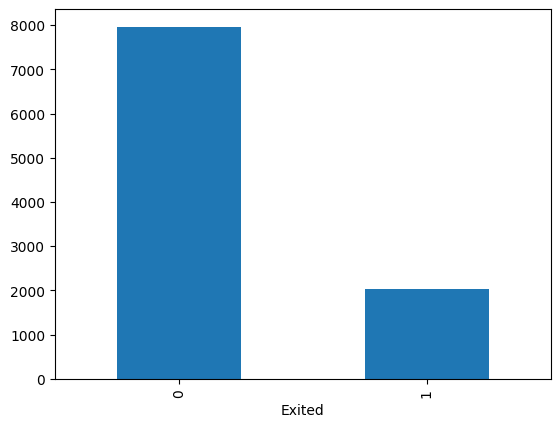

In [84]:
print(df['Exited'].value_counts())
df['Exited'].value_counts().plot(kind="bar")

In [85]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

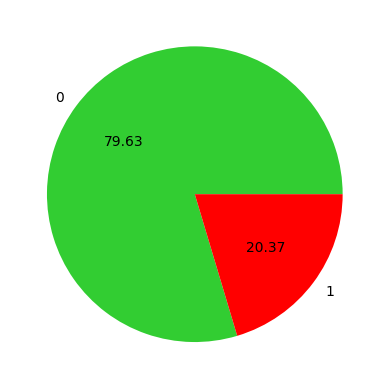

In [86]:
plt.pie(labels=[0,1],x=df['Exited'].value_counts(),autopct="%.2f",colors=['limegreen','red'])
plt.show()

In [87]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

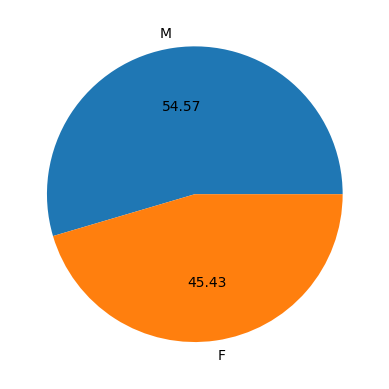

In [88]:
plt.pie(labels=['M','F'],x=df['Gender'].value_counts(),autopct="%.2f")
plt.show()

In [89]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

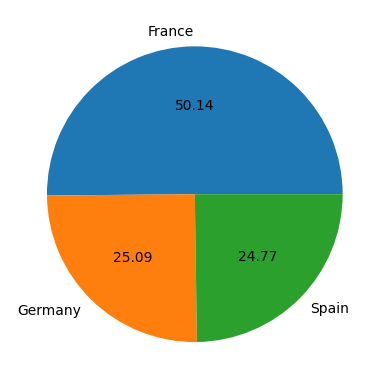

In [90]:
plt.pie(labels=['France','Germany','Spain'],x=df['Geography'].value_counts(),autopct="%.2f")
plt.show()

In [91]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [92]:
df[df['Exited'] == 1]['Gender'].value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

In [93]:
1139+898

2037

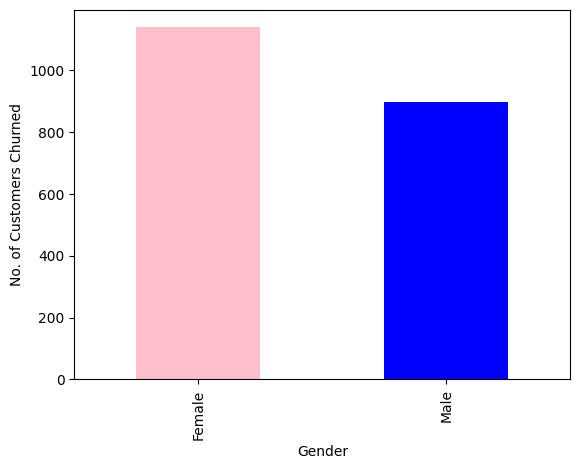

In [94]:
df[df['Exited'] == 1]['Gender'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.ylabel('No. of Customers Churned')

plt.show()

In [95]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

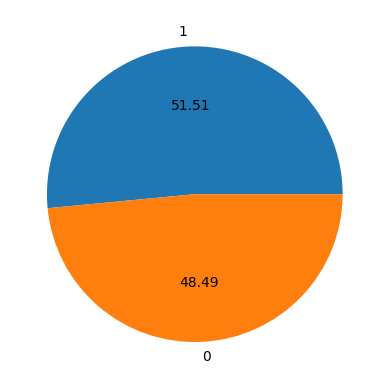

In [96]:
df['IsActiveMember'].value_counts()

plt.pie(labels=[1,0],x=df['IsActiveMember'].value_counts(),autopct="%.2f")
plt.show()

In [97]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [98]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [99]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [103]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
lr_cm = confusion_matrix(y_test,lr_pred)
lr_cm

array([[1553,   42],
       [ 380,   25]])

In [108]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

0.789

In [109]:
from sklearn.svm import SVC
svc  = SVC()

In [110]:
svc.fit(X_train,y_train)

SVC()

In [111]:
svc_pred = svc.predict(X_test)
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
svc_cm = confusion_matrix(y_test,svc_pred)
svc_cm

array([[1595,    0],
       [ 405,    0]])

In [113]:
svc_acc = accuracy_score(y_test,svc_pred)
svc_acc

0.7975

In [114]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
xgb_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, xgb_pred)
acc

0.8525

In [116]:
xgb_cm = confusion_matrix(y_test,xgb_pred)
xgb_cm

array([[1489,  106],
       [ 189,  216]])

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_acc

0.867

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [121]:
gbc_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, gbc_pred)
gbc_acc

0.8675

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_acc

0.8

In [125]:
from sklearn.ensemble import VotingClassifier

In [126]:
vc  = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dtc),
    ('svc', svc),
    ('gb', gbc)
],voting="hard").fit(X_train, y_train)
vc_pred = vc.predict(X_test)
vc_acc = accuracy_score(y_test, vc_pred)
vc_acc

0.802

In [127]:
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'Gradient Boosting', 'Voting Classifier (Hard)','Random Forest','XGBoost'],
    'Accuracy': [lr_acc, dtc_acc, svc_acc, gbc_acc, vc_acc, rfc_acc,acc]
})

print(accuracy_df)

                      Model  Accuracy
0       Logistic Regression    0.7890
1             Decision Tree    0.8000
2                       SVC    0.7975
3         Gradient Boosting    0.8675
4  Voting Classifier (Hard)    0.8020
5             Random Forest    0.8670
6                   XGBoost    0.8525
